In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [3]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [4]:
df.shape

(3333, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
#Check data missing
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

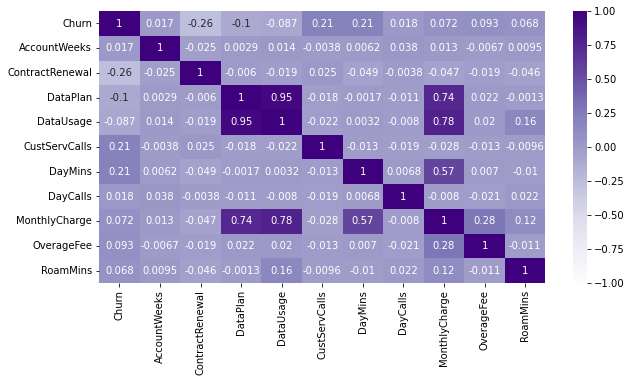

In [8]:
#Correlation
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), vmax=1, vmin=-1, cmap='Purples', annot=True)

plt.show()

In [9]:
#cCheck duplicate 
df.duplicated().any()


False

In [10]:
#Melihat jumlah churn and no churn
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

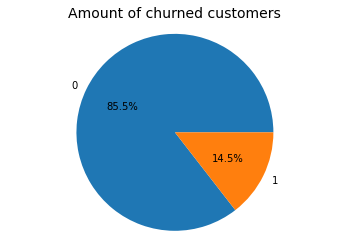

In [11]:
target = df["Churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

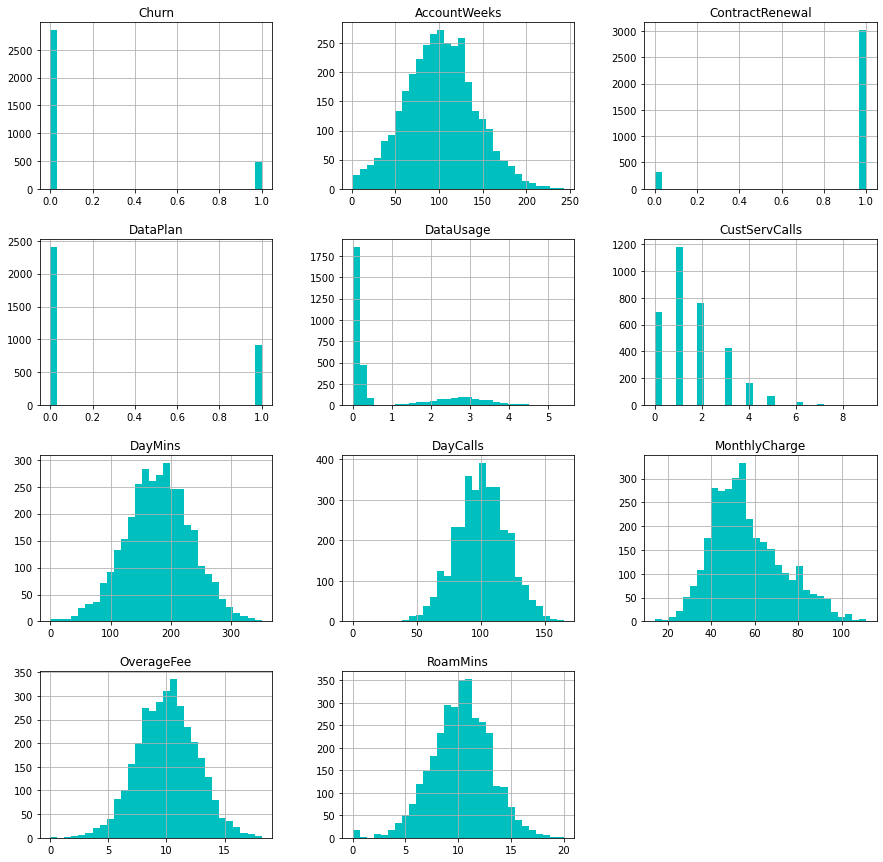

In [12]:
#Visualisasi semua tabel
df.hist(figsize=(15,15), bins=30, color='c')

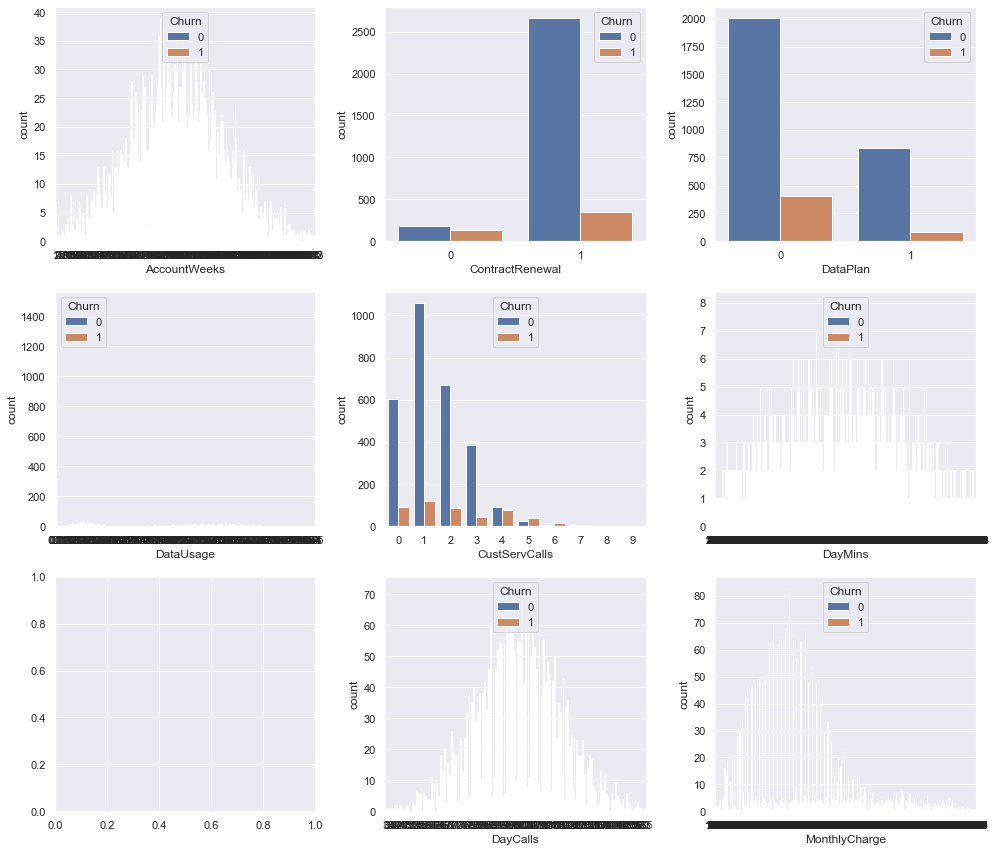

In [13]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='AccountWeeks', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='ContractRenewal', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='DataPlan', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='DataUsage', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='CustServCalls', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='DayMins', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='DayCalls', hue='Churn', ax=ax[2][1])
sns.countplot(data=df, x='MonthlyCharge', hue='Churn', ax=ax[2][2])
# sns.countplot(data=df, x='OverageFee', hue='Churn', ax=ax[2][3]) #biaya lebih
# sns.countplot(data=df, x='RoamMins', hue='Churn', , ax=ax[3][1])
plt.tight_layout()
plt.show()

In [14]:
df["ContractRenewal"].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [15]:
df["AccountWeeks"].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: AccountWeeks, Length: 212, dtype: int64

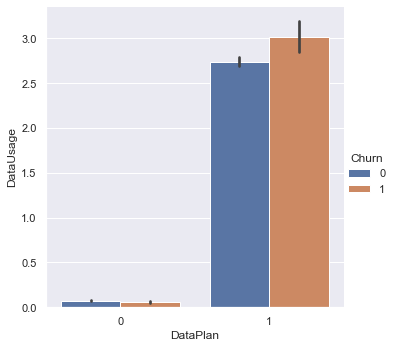

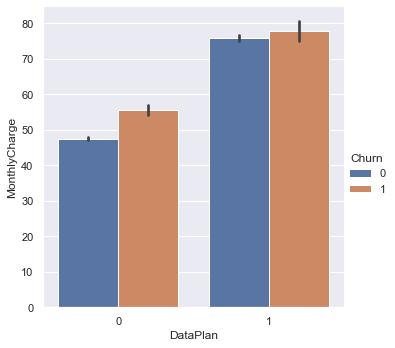

In [16]:
# nilai 9,5
sns.catplot(x="DataPlan", y="DataUsage", hue="Churn", kind="bar", data=df)
# memiliki nilai 0,74
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", kind="bar", data=df)


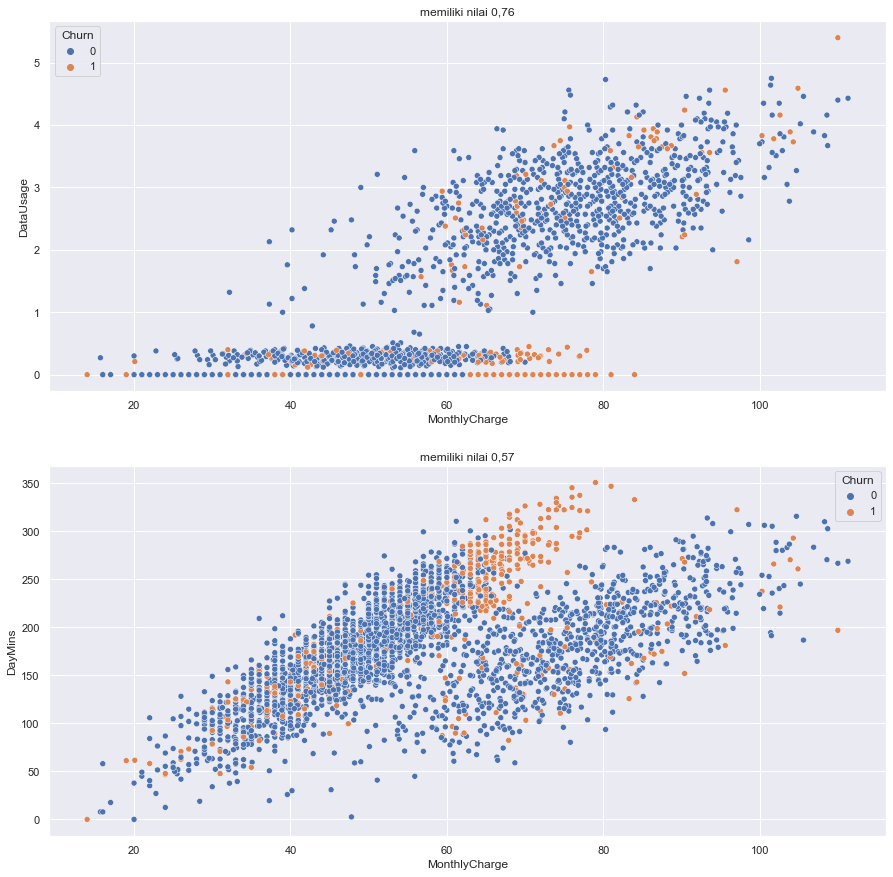

In [17]:
fig, (satu , dua) = plt.subplots(2 , figsize = (15,15))
satu = sns.scatterplot(data = df, x = 'MonthlyCharge', y = 'DataUsage', hue = 'Churn', ax = satu)
dua = sns.scatterplot(data = df, x = 'MonthlyCharge', y = 'DayMins', hue = 'Churn', ax = dua )

satu.set_xlabel('MonthlyCharge')
dua.set_xlabel('MonthlyCharge')

satu.set_ylabel('DataUsage')
dua.set_ylabel('DayMins')

satu.set_title('memiliki nilai 0,76')
dua.set_title('memiliki nilai 0,57')
plt.show()

In [18]:
#Penyebab churn itu terjadi karena contractRenewal, oleh karena itu banyak karyawan yang memilih churn dari pada no churn

C:\Users\Stefanus Adyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustServCalls'>

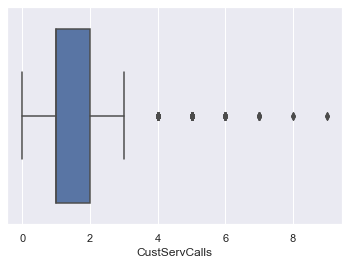

In [21]:
#outlier
sns.boxplot(df['CustServCalls'])

In [22]:
print(np.where(df['CustServCalls'] > 3))

(array([  10,   14,   15,   21,   48,   54,   69,   77,   86,   97,  100,
        105,  112,  126,  127,  133,  136,  154,  180,  181,  198,  228,
        235,  248,  250,  251,  255,  266,  293,  298,  307,  332,  349,
        350,  351,  366,  385,  392,  404,  407,  449,  473,  498,  509,
        521,  522,  534,  542,  547,  549,  550,  588,  612,  627,  635,
        655,  692,  694,  711,  721,  736,  742,  771,  778,  841,  865,
        871,  874,  879,  894,  902,  905,  908,  911,  935,  944,  951,
        974,  977,  978, 1038, 1040, 1044, 1045, 1077, 1102, 1104, 1121,
       1133, 1142, 1150, 1155, 1176, 1192, 1193, 1197, 1217, 1235, 1240,
       1241, 1246, 1253, 1262, 1269, 1272, 1273, 1282, 1284, 1285, 1325,
       1339, 1345, 1368, 1373, 1376, 1388, 1396, 1399, 1405, 1407, 1437,
       1448, 1449, 1493, 1502, 1531, 1537, 1538, 1610, 1619, 1635, 1638,
       1662, 1673, 1694, 1699, 1702, 1707, 1708, 1712, 1713, 1728, 1765,
       1802, 1831, 1835, 1844, 1851, 1865, 1880, 1